In [1]:
import os, sys
from pathlib import Path
import json

import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

PLOT_DIR = Path(os.path.join(os.path.dirname(os.getcwd()), "plots"))
assert PLOT_DIR.is_dir()
PLOT_DIR

PosixPath('/home/wukevin/projects/protdiff/plots')

In [2]:
BASELINE_SCTM_SCORES_JSON = "/home/wukevin/projects/protdiff_results/sctm_random_baseline/sctm_scores.json"
with open(BASELINE_SCTM_SCORES_JSON) as source:
    baseline_sctm = json.load(source)

NATURAL_SCTM_SCORES_JSON = "/home/wukevin/projects/protdiff_results/sctm_baselien_distribution/baseline_sctm_scores.json"
with open(NATURAL_SCTM_SCORES_JSON) as source:
    natural_sctm = json.load(source)

GENERATE_SCTM_SCORES_JSON = "/home/wukevin/projects/protdiff_results/generation-cosine-epoch-1488-sweep/sctm_scores.json"
with open(GENERATE_SCTM_SCORES_JSON) as source:
    generated_sctm = json.load(source)

In [3]:
def to_arr(x):
    x = np.array(list(x))
    return x[~np.isnan(x)]


stats.mannwhitneyu(
    to_arr(generated_sctm.values()),
    to_arr(baseline_sctm.values()),
)

MannwhitneyuResult(statistic=417832.5, pvalue=4.374068292433547e-60)

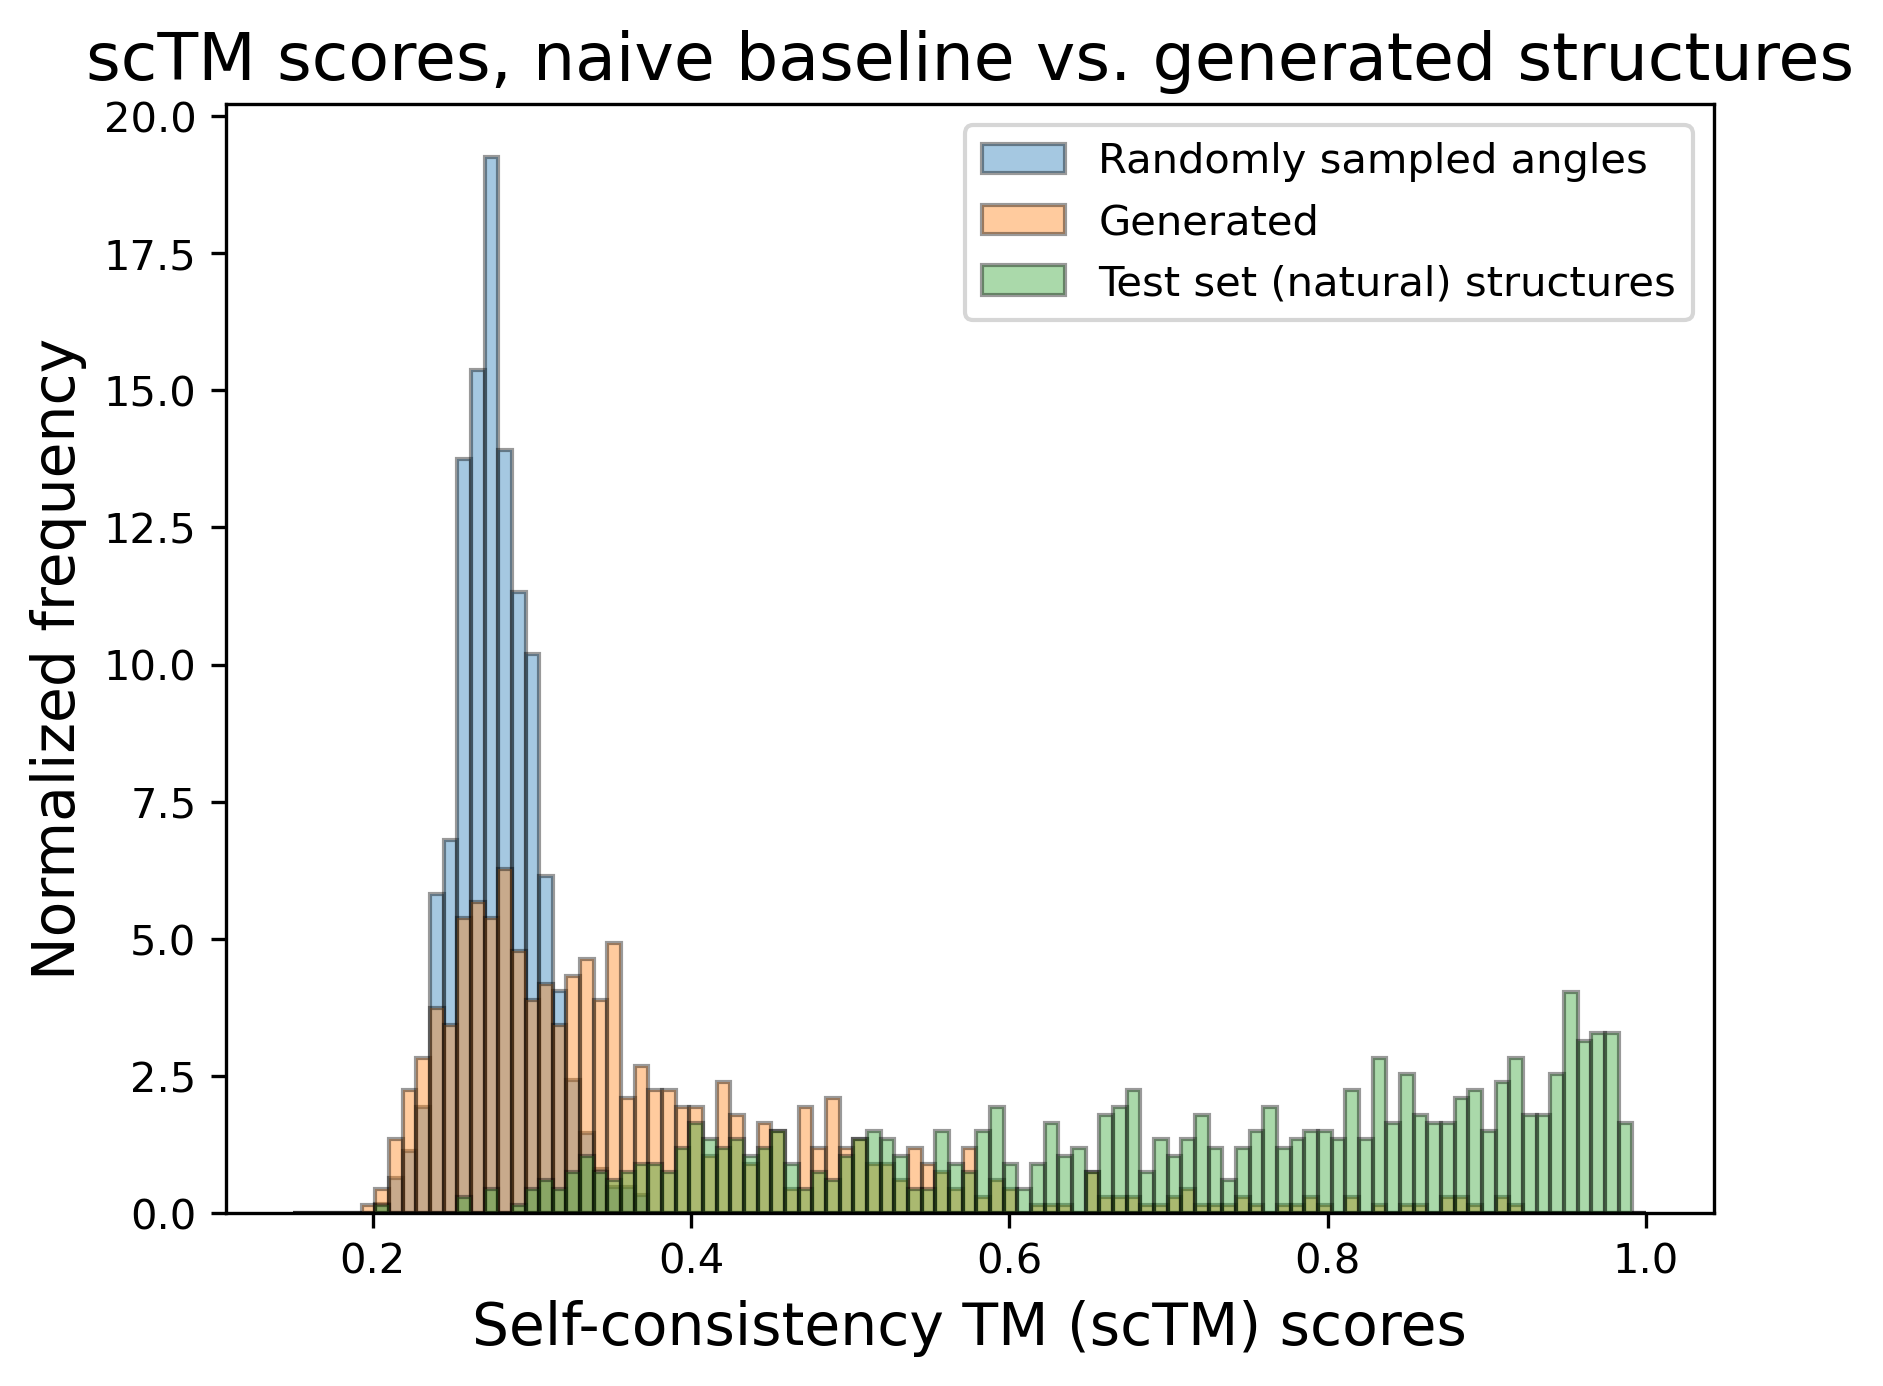

In [4]:
bins=np.linspace(0.15, 1.0, num=100)

fig, ax = plt.subplots(dpi=300)
ax.hist(
    baseline_sctm.values(),
    bins=bins,
    label="Randomly sampled angles",
    density=True,
    alpha=0.4,
    edgecolor='black',
)
ax.hist(
    generated_sctm.values(),
    bins=bins,
    label="Generated",
    density=True,
    alpha=0.4,
    edgecolor='black',
)
ax.hist(
    natural_sctm.values(),
    bins=bins,
    label="Test set (natural) structures",
    density=True,
    alpha=0.4,
    edgecolor='black',
)

ax.legend()
ax.set_title("scTM scores, naive baseline vs. generated structures", fontsize=16)
ax.set_xlabel("Self-consistency TM (scTM) scores", fontsize=14)
ax.set_ylabel("Normalized frequency", fontsize=14)
fig.savefig(PLOT_DIR / "sctm_scores_gen_vs_baseline.pdf", bbox_inches='tight')
fig.show()